# Лабораторная работа № 1
## Персептроны. Процедура обучения Розенблатта
Цель работы: исследование свойств персептрона Розенблатта и его применение для решения задачи распознавания образов

|Студент| Попов И.П.|
|-|-|
|Группа| М8О-406Б-20|
|Вариант| 17|

In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

### 1 набор данных

In [2]:
px = [1.4, 1.3, 1.4, 2.2, 4.9, -4]
py = [-0.3, 0.4, 0.4, 0.2, -2.9, -4]

classes = [1, 1, 1, 1, 0, 0]

Созданы тензоры x_train и y_train на основе координат точек и меток классов

In [3]:
x_train = torch.FloatTensor(np.array(list(zip(px, py))))
y_train = torch.FloatTensor(np.array(classes))

Определен класс Perceptron, модель включает в себя параметры весов и параметры смещения. Метод forward определяет процесс прямого прохода (forward pass) через перцептрон.

In [4]:
class Perceptron(nn.Module):
    def __init__(self, in_features: int, out_features: int, bias: bool = True):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(in_features, out_features))
        self.bias = bias
        if bias:
            self.bias_term = nn.Parameter(torch.randn(out_features))

    def forward(self, x):
        x = x @ self.weights
        if self.bias:
            x += self.bias_term
        return x

Создается Perceptron с двумя входными нейронами и одним выходным, функция потерь MAE и в качестве оптимизатора выступает стохастический градиентный спуск (SGD) с коэффициентом обучения 0.05. Оптимизатор использует параметры модели perceptron для обновления их значений в процессе обучения с целью минимизации функции потерь.

In [5]:
perceptron = Perceptron(2, 1)
loss_function = nn.L1Loss()
optimizer = torch.optim.SGD(perceptron.parameters(), lr=0.05)


Определена функция fit, которая представляет цикл обучения для модели машинного обучения. Внутри цикла происходит прямой проход через модель, вычисление функции потерь с использованием сигмоидной функции, обратное распространение ошибки, обновление параметров модели с помощью оптимизатора и сохранение значений функции потерь на каждой эпохе.

In [6]:
def fit(model, x_train, y_train, criterion, optimizer, epochs):
    losses = []  # Здесь будут сохраняться значения функции потерь на каждой эпохе
    log_template = "Epoch {ep:03d} train_loss: {t_loss:0.4f}"

    for epoch in range(epochs):
        optimizer.zero_grad()
        outp = model(x_train)

        probabilities = torch.sigmoid(outp.view(-1))
        loss = criterion(probabilities, y_train)

        loss.backward()
        losses.append(loss.detach().flatten()[0])
        optimizer.step()

        print(log_template.format(ep=epoch+1, t_loss=loss))

    return losses


Обучение перцептрона на данных x_train с метками y_train в течение 1000 эпох. 

In [ ]:
losses = fit(perceptron, x_train, y_train, loss_function, optimizer, 1000)

Построен график функции ошибки

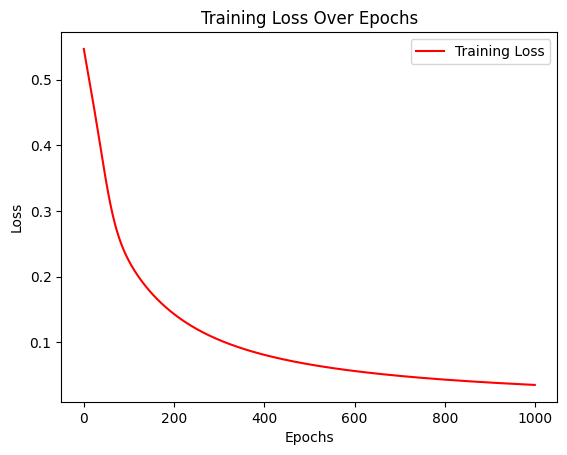

In [8]:
plt.plot(losses, color='red', label='Training Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.show()

Сохранены текущие веса и смещение модели

In [9]:
current_weights = perceptron.weights.detach().clone()
w = current_weights.flatten().numpy()

current_bias = perceptron.bias_term.detach().clone()
b = current_bias.flatten().numpy()

Решение задачи линейной разделимости 

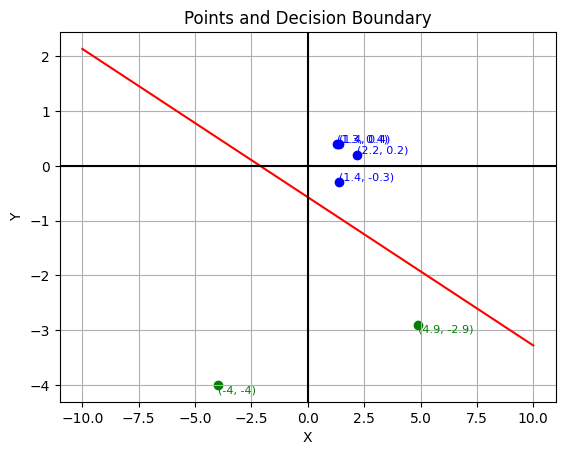

In [10]:
X = np.linspace(-10, 10, 100)

def discriminant(x):
    return (-x * w[0] - b[0]) / w[1]

plt.plot(X, discriminant(X), "red", label="Decision Boundary")

plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

for x, y, c in list(zip(px, py, y_train)):
    if c == 1:
        plt.scatter(x, y, c="blue", label="Class 1")
        plt.text(x, y, f'({x}, {y})', fontsize=8, color='blue', verticalalignment='bottom')
    else:
        plt.scatter(x, y, c="green", label="Class 0")
        plt.text(x, y, f'({x}, {y})', fontsize=8, color='green', verticalalignment='top')

# plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Points and Decision Boundary')
plt.show()

### 2 набор данных

In [11]:
x2 = [-2.6, -4.1, 4.4, 0.7, -2.7, 3.2, -4.6, 1.4]
y2 = [-1, -3.7, 4.5, -4.5, -1.5, -4.9, -3.4, 2.3]


c2_1 = [0, 0, 0, 1, 0, 1, 0, 0]
c2_2 = [0, 0, 1, 0, 0, 1, 0, 1]

In [12]:
x_train2 = torch.FloatTensor(np.array(list(zip(x2, y2))))
y_train2 = torch.FloatTensor(np.array(list(zip(c2_1, c2_2))))

In [13]:
perceptron2 = Perceptron(2, 2)
loss_function = nn.L1Loss()
optimizer = torch.optim.SGD(perceptron2.parameters(), lr=0.05)

In [14]:
def fit2(model, x_train, y_train, criterion, optimizer, epochs):
    losses = []
    log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f}"
    for epoch in range(epochs):
        optimizer.zero_grad()
        outp = model(x_train)

        probaba = torch.sigmoid(outp)

        loss1 = criterion(probaba[:, 0], y_train[:, 0])
        loss2 = criterion(probaba[:, 1], y_train[:, 1])
        loss = loss1 + loss2

        loss.backward()
        losses.append(loss.detach().flatten()[0])
        optimizer.step()
        print(log_template.format(ep=epoch+1, t_loss=loss))
    return losses

In [ ]:
losses2 = fit2(perceptron2, x_train2, y_train2, loss_function, optimizer, 1000)

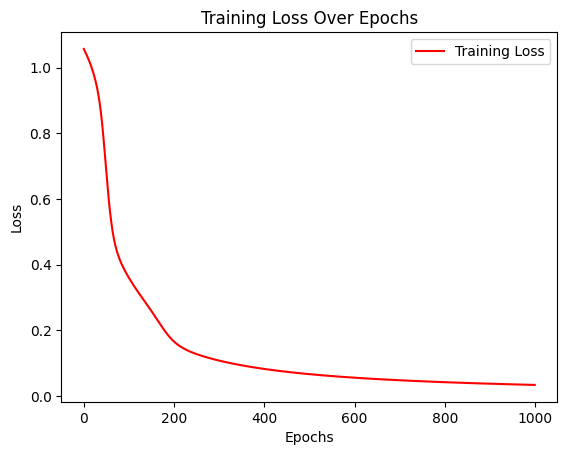

In [16]:
plt.plot(losses2, color='red', label='Training Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.show()

In [17]:
current_weights = perceptron2.weights.detach().clone()
w = current_weights.numpy()

current_bias = perceptron2.bias_term.detach().clone()
b = current_bias.numpy()


Функция decode_one_hot преобразует массив двоичных значений, представляющих one-hot кодировку, обратно в целочисленные значения. Она объединяет два бита для каждого элемента массива и преобразует полученное двоичное значение в целое число.

In [18]:
def decode_one_hot(arr):
    arr_new = []

    for i, y in enumerate(arr):
        arr_new.append(int(str(y[0]) + str(y[1]), 2))

    return np.array(arr_new)

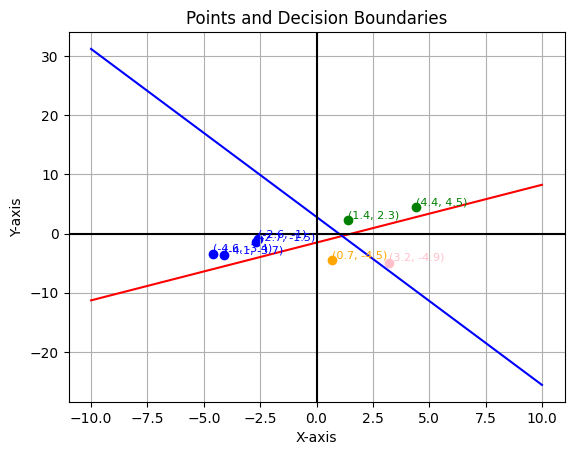

In [19]:
X = np.linspace(-10, 10, 100)

def discriminant1(x):
    return (-x * w[0][0] - b[0]) / w[1][0]

def discriminant2(x):
    return (-x * w[0][1] - b[0]) / w[1][1]

plt.plot(X, discriminant1(X), "red", label="Class 0 Discriminant")
plt.plot(X, discriminant2(X), "blue", label="Class 1 Discriminant")

plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

y_train2 = decode_one_hot(y_train2.to(torch.int).numpy())
for x, y, c in list(zip(x2, y2, y_train2)):
    if c == 0:
        plt.scatter(x, y, c="blue", label="Class 0")
        plt.text(x, y, f'({x}, {y})', fontsize=8, color='blue', verticalalignment='bottom')
    elif c == 1:
        plt.scatter(x, y, c="green", label="Class 1")
        plt.text(x, y, f'({x}, {y})', fontsize=8, color='green', verticalalignment='bottom')
    elif c == 2:
        plt.scatter(x, y, c="orange", label="Class 2")
        plt.text(x, y, f'({x}, {y})', fontsize=8, color='orange', verticalalignment='bottom')
    else:
        plt.scatter(x, y, c="pink", label="Class 3")
        plt.text(x, y, f'({x}, {y})', fontsize=8, color='pink', verticalalignment='bottom')

# plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Points and Decision Boundaries')
plt.show()

**Выводы:** В ходе выполнения лабораторной работы я узнал, как эффективно использовать библиотеку PyTorch для реализации и обучения нейронных сетей. Это позволило лучше понять принципы машинного обучения и его применение в задачах классификации.